In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/train_data/train_data',
        target_size=(640, 640),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
         '/content/drive/MyDrive/test_data/test_data',
         target_size=(640, 640),
        batch_size=32,
        class_mode='categorical')

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
vgg = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(640,640,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
for layer in vgg.layers:
  layer.trainable = False

In [7]:
input = tf.keras.layers.Input(shape=(640, 640, 3))

In [8]:
x = vgg(input, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(16, activation='softmax')(x)

In [9]:
model = tf.keras.models.Model(inputs=input, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 640, 640, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 20, 20, 512)       14714688  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 256)               52429056  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0     

In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
history = model.fit(
        train_generator,
        epochs=10, 
        validation_data = validation_generator,
        batch_size = 32,
        )

Epoch 1/10
5/5 [==============================] - 207s 50s/step - loss: 7.5792 - accuracy: 0.1067 - val_loss: 4.6154 - val_accuracy: 0.1401
Epoch 2/10
5/5 [==============================] - 109s 24s/step - loss: 5.5169 - accuracy: 0.1000 - val_loss: 2.6486 - val_accuracy: 0.2038
Epoch 3/10
5/5 [==============================] - 107s 24s/step - loss: 3.3940 - accuracy: 0.1667 - val_loss: 2.8183 - val_accuracy: 0.1720
Epoch 4/10
5/5 [==============================] - 111s 25s/step - loss: 2.4897 - accuracy: 0.2600 - val_loss: 2.5457 - val_accuracy: 0.1720
Epoch 5/10
5/5 [==============================] - 108s 24s/step - loss: 2.5375 - accuracy: 0.2200 - val_loss: 2.5064 - val_accuracy: 0.2420
Epoch 6/10
5/5 [==============================] - 106s 23s/step - loss: 2.3813 - accuracy: 0.2600 - val_loss: 2.4201 - val_accuracy: 0.2293
Epoch 7/10
5/5 [==============================] - 108s 24s/step - loss: 2.3018 - accuracy: 0.2400 - val_loss: 2.4729 - val_accuracy: 0.2484
Epoch 8/10
5/5 [====

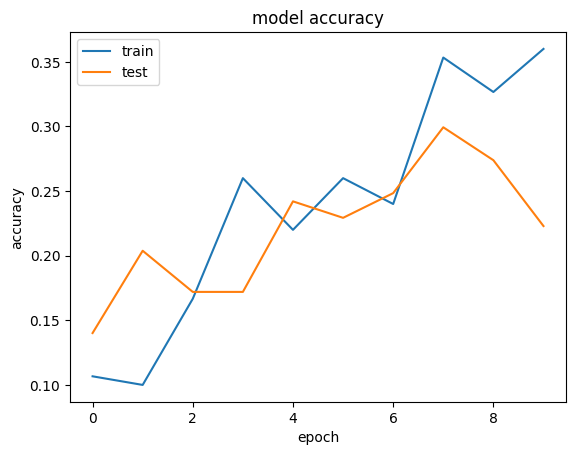

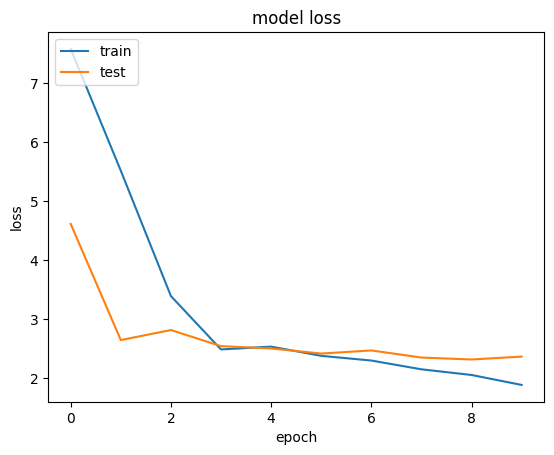

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()